# 4章 NumPyの基礎:配列とベクトル演算

** NumPyの特徴 **
* NumPy は __C言語と双方向のデータのやり取りができる。__  
（Pythonはインタプリタ型言語である為、性能を求められる場面では低レベルな言語に処理を委譲できる）
* Numpy 自体はC言語で記述されており、Python標準の同機能と比べて __高速 かつ メモリ使用量も少ない。__
* __お作法として、NumPyの呼び出しは `import numpy as np` __

In [1]:
# NumPyの呼び出し(記法は慣例的なお約束)
import numpy as np

# np.ndarrayの生成
data = np.array([[1, 2, 3], [4, 5, 6]])
type(data)
data

array([[1, 2, 3],
       [4, 5, 6]])

## 4.1 NumPy ndarray:多次元配列オブジェクト

p95  
* __ndarrayに対する算術操作は、配列要素全てに作用する。__

p96
* Python標準のリストと異なり、__要素は全て同じ型でなければいけない。__
* `shape` で次元確認。`dtype` で要素の型を確認可能。
* 分析用途で Python を使用するならば NumPy の習得は必須。

In [2]:
# 算術操作は、配列要素全てに作用
print("### 算術操作は、配列要素全てに作用\ndata = {}\ndata * 2 = {}\n".format(
    data, data * 2))

# ndarrayの生成
data = np.array([1, 2])
print("### Python標準のリストと異なり、要素は全て同じ型でなければいけない。\nnp_test = {} [{}]".format(data, data.dtype))
print("np_test[0] に 'a' を代入")

try:
    data[0] = 'a'
except Exception as e:
    print("例外発生\nエラーメッセージ：{}".format(e.args))
else:
    print("例外は発生しませんでした。")

### 算術操作は、配列要素全てに作用
data = [[1 2 3]
 [4 5 6]]
data * 2 = [[ 2  4  6]
 [ 8 10 12]]

### Python標準のリストと異なり、要素は全て同じ型でなければいけない。
np_test = [1 2] [int64]
np_test[0] に 'a' を代入
例外発生
エラーメッセージ：("invalid literal for int() with base 10: 'a'",)


***
p97
* `np.zeros`、`np.ones` で要素を初期化。

p98
* 配列要素の型が指定されなかった場合、float64で初期化。
* `np.identity()` で単位行列を作成。`np.eye()`　はより[細かい制御が可能](https://deepage.net/features/numpy-eye.html#npeye) 。

p99
* dtypeで要素の型を指定可能 (他言語と連携する際は、ビット長を記す）。

p100
* astypeメソッドでdtypeを変更可能。(使用時は、新たな ndarray オブジェクトが生成される)

In [3]:
# 2×2のゼロ行列を作成
print("np.zeros(2): {}\n".format(np.zeros(2)))

# 要素を全て１で埋める
print("data: {}".format(data))
print("np.ones(data): {}\n".format(np.ones(data)))

# 連番のベクトルを作成
print("np.orange(5): {}\n".format(np.arange(5)))

# 単位行列の作成
print("np.identity(3):\n {}\n".format(np.identity(3)))

# [1.0,2.2]（float型）ををint型に変換
print("dype=np.int: {}".format(np.array([1.0,2.2], dtype=np.int)))

np.zeros(2): [0. 0.]

data: [1 2]
np.ones(data): [[1. 1.]]

np.orange(5): [0 1 2 3 4]

np.identity(3):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

dype=np.int: [1 2]


***
p101
* 同じサイズの __ndarray 同士の算術演算は、同一の要素同士で計算される。__  
(サイズの異なる ndarray 同士の算術演算はブロードキャストと呼ばれる)

In [4]:
data = np.array([1, 5])
data2 = np.array([2, 4])
print("data: {}, data2: {}\n".format(data,data2))

print("data + data2 = {}".format(data + data2))
print("data / data2 = {}".format(data / data2))
print("data > data2 = {}".format(data > data2))

data: [1 5], data2: [2 4]

data + data2 = [3 9]
data / data2 = [0.5  1.25]
data > data2 = [False  True]


***
p103
* スライスへの変更は、操作元に反映される。 (コピーが必要な場合は `copy()` を使用する。)  
* 多次元配列の要素へのアクセスには、インデックスのコンマ区切りリストでアクセス可能。

<img src="./image/chapter_04_001.jpg" alt="NumPy ２次元配列のインデックスの仕組み" title="NumPy ２次元配列のインデックスの仕組み" width="300" height="300">

p107
* 単独のコロン（：）は軸全体を表す。軸とはaxisの事（後述）
<img src="./image/chapter_04_002.jpg" alt="NumPy ２次元配列のスライシング" title="NumPy ２次元配列のスライシング" width="500" height="300">


In [5]:
print("### ndarrayへのスライシングによる変更は、操作元に反映される")
data = np.arange(5)

# インデックス番号 2,3 にアクセス
arr_slice = data[2:4]
print("data = {}".format(data))

# スライスの全要素に 5 を代入
arr_slice[:] = 5
print("arr_slice[0] = 5\ndata = {}\n".format(data))

print("### 多次元配列の要素へのアクセス")
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("data = \n{}".format(data))
print("data[1][1] = {}".format(data[1][1]))
print("data[1, 1] = {}\n".format(data[1, 1])) # この書き方もOK

print("### 複数のスライスも指定可能")
print("data[:2, 1:] = \n{}".format(data[:2, 1:]))


### ndarrayへのスライシングによる変更は、操作元に反映される
data = [0 1 2 3 4]
arr_slice[0] = 5
data = [0 1 5 5 4]

### 多次元配列の要素へのアクセス
data = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
data[1][1] = 5
data[1, 1] = 5

### 複数のスライスも指定可能
data[:2, 1:] = 
[[2 3]
 [5 6]]


***
p109
* 真偽値配列を使用してインデックス参照（__ブールインデックス参照__）が可能。
* ブールインデックス参照を使用する場合は、参照先の軸の要素数と真偽値配列の要素数が一致している必要がある。  
（要素数が異なっている場合、明示的なエラーが発生しないことがある為、要注意）  

p110
* 演算子 ~ は 条件式の結果を反転させる。
* 論理演算子として、and、orキーワードは使用できない。＆、｜を使用する。。
* ブールインデックス参照は__コピーが作成__される。

In [6]:
# （7,4)行列を作成。要素は標準正規分布
data = np.random.randn(7, 4)
print("data = \n{}\n".format(data))

names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

# 真偽値配列を作成
bool_names = (names == "Bob")
print("names == 'Bob'\n{} {}\n".format(bool_names, bool_names.dtype))

# data の インデックス番号 0,2 の行の３列目以降を取得 （デフォルトは axis=0 ）
print("data[names == 'Bob', 2:]\n{}\n".format(data[names == 'Bob', 2:]))

# Bob またJoe ではない（＝Will）ブールインデックス参照
print("data[~((names == 'Bob') | (names == 'Joe'))]\n{}\n".format(data[~((names == 'Bob') | (names == 'Joe'))]))

# 条件を満たす要素にゼロを代入
data[data < 0] = 0
print("data[data < 0] = 0 \n{}".format(data))

data = 
[[ 0.88054135  2.13056583  0.82084456  0.23890534]
 [-0.27819174 -0.54510659 -0.40159815 -2.01968417]
 [-0.6526113  -0.62522541  1.01935729  0.81349199]
 [ 0.50352333  0.04825818  1.02392687 -0.24090645]
 [-0.47332059  0.4513057  -0.07305773  0.46393897]
 [ 1.01939127  0.13793575  0.58420409  1.55913676]
 [ 0.27600629 -1.69991147  0.08848014  1.34824878]]

names == 'Bob'
[ True False False  True False False False] bool

data[names == 'Bob', 2:]
[[ 0.82084456  0.23890534]
 [ 1.02392687 -0.24090645]]

data[~((names == 'Bob') | (names == 'Joe'))]
[[-0.6526113  -0.62522541  1.01935729  0.81349199]
 [-0.47332059  0.4513057  -0.07305773  0.46393897]]

data[data < 0] = 0 
[[0.88054135 2.13056583 0.82084456 0.23890534]
 [0.         0.         0.         0.        ]
 [0.         0.         1.01935729 0.81349199]
 [0.50352333 0.04825818 1.02392687 0.        ]
 [0.         0.4513057  0.         0.46393897]
 [1.01939127 0.13793575 0.58420409 1.55913676]
 [0.27600629 0.         0.08848014 1

***
p112
* インデックス参照に、整数配列を用いた参照方法を __ファンシーインデックス参照__ と呼ぶ。

In [7]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

print("arr = \n{}\n".format(arr))

#ファンシーインデックス参照
print("arr[[4, 3, 0, 6]] = \n{}\n".format(arr[[4, 3, 0, 6]]))

# reshapeはコピーを作成
arr = np.arange(32).reshape((8,4))
print("arr = \n{}\n".format(arr))

print("### arr から　[1,0]、[5, 3], [7, 2], [2, 2]　の要素をコピー")
print("arr[[1, 5, 7, 2], [0, 3, 1, 2]] = {}".format(arr[[1, 5, 7, 2], [0, 3, 1, 2]]))

arr = 
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]

arr[[4, 3, 0, 6]] = 
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]

arr = 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

### arr から　[1,0]、[5, 3], [7, 2], [2, 2]　の要素をコピー
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = [ 4 23 29 10]


***
p113
* 転置はビューを返す。(transpose は T より複雑な行列の再配置が行える）。

p114
* swapaxesは任意の軸を入れ替えられる。

In [8]:
arr = np.arange(15).reshape(3, 5)
print("arr = \n{}\n".format(arr))
print("arr.T = \n{}\n".format(arr.T))

# 2×3×4 行列
arr2 = np.arange(24).reshape(2, 3, 4)
print("### 転置前のオリジナル　2×3×4 行列")
print("arr2 = \n{}\n".format(arr2))

print("### 引数が axis（軸）。今回は、０番目と１番目の軸を入れ替えた(= 3×2×4 行列)ビューを作成")
print("arr2.transpose(1,0,2) = \n{}\n".format(arr2.transpose(1, 0, 2)))

print("### 1番目と2番目の軸を入れ替えた(= 2×4×3 行列) ビューを作成")
print("arr2.swapaxes(1,2) = \n{}\n".format(arr2.swapaxes(1, 2)))

# 遊び：多次元配列を理解する練習
arr3 = np.arange(120).reshape(2, 3, 4, 5)
arr4 = np.arange(120).reshape(1, 2, 3, 4, 5)

arr = 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

arr.T = 
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

### 転置前のオリジナル　2×3×4 行列
arr2 = 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

### 引数が axis（軸）。今回は、０番目と１番目の軸を入れ替えた(= 3×2×4 行列)ビューを作成
arr2.transpose(1,0,2) = 
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]

### 1番目と2番目の軸を入れ替えた(= 2×4×3 行列) ビューを作成
arr2.swapaxes(1,2) = 
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]



## 4.2 ユニバーサル関数:すべての配列要素への関数適用

p114
* 全ての配列要素に関数をて適用する関数を __ユニバーサル関数__ と呼ぶ。

p116
* 関数結果は自分に影響を与えない（出力に自分自身を指定した場合は除く）


In [9]:
arr = np.random.randn(8)
print("適用前 arr = {}\n".format(arr))
print("np.rint(arr) = {}\n".format(np.rint(arr)))
print("適用後 arr = {}\n".format(arr))

print("### 計算結果に自身を指定")
np.rint(arr, arr)
print("np.rint(arr, arr) = {}\n".format(arr))

適用前 arr = [-0.58154442  0.44547455  0.31288826  0.04378179  1.62455416 -1.60405026
  0.04028855  1.91468069]

np.rint(arr) = [-1.  0.  0.  0.  2. -2.  0.  2.]

適用後 arr = [-0.58154442  0.44547455  0.31288826  0.04378179  1.62455416 -1.60405026
  0.04028855  1.91468069]

### 計算結果に自身を指定
np.rint(arr, arr) = [-1.  0.  0.  0.  2. -2.  0.  2.]



## 4.3 ndarrayによる配列指向プログラミング
p117
* ベクトル演算はPython標準と比べて__非常に高速。__
* numpy.where は　三項演算子のベクトル版。

p121
* 統計関数は軸を指定可能。

In [10]:
# 4×4行列を作成。要素は標準正規分布
arr = np.random.randn(4, 4)
print("arr = \n{}\n".format(arr))
print("arr > 0 \n{}\n".format(arr > 0))

print("### arr の要素が 0 より大きければ 1 を、それ以外は -2 で置換する。")
print("np.where(arr > 0, 1, -2) \n{}\n".format(np.where(arr > 0, 1, -2)))

arr2 = np.arange(6).reshape(2, 3)
print("arr2 \n{}\n".format(arr2))
print("arr2.mean() \n{}\n".format(arr2.mean()))
print("np.mean(arr) \n{}\n".format(np.mean(arr)))
print("arr2.mean(1) \n{}\n".format(arr2.mean(1)))

arr = 
[[ 0.59656788  0.85492722  0.35428915 -0.70683823]
 [-0.9002764  -0.98592633  0.33706954 -0.37696156]
 [ 0.4525175  -0.12489672 -0.86366461  1.18343514]
 [ 2.32185362 -0.27848774 -1.47937479  0.73189732]]

arr > 0 
[[ True  True  True False]
 [False False  True False]
 [ True False False  True]
 [ True False False  True]]

### arr の要素が 0 より大きければ 1 を、それ以外は -2 で置換する。
np.where(arr > 0, 1, -2) 
[[ 1  1  1 -2]
 [-2 -2  1 -2]
 [ 1 -2 -2  1]
 [ 1 -2 -2  1]]

arr2 
[[0 1 2]
 [3 4 5]]

arr2.mean() 
2.5

np.mean(arr) 
0.06975818708265381

arr2.mean(1) 
[1. 4.]



***
p122
* True=1、False=0 として評価される。

p123
* any,allとも真偽値以外の配列に対して適用可能（ゼロ以外は True扱い）


In [11]:
arr = np.random.randn(6)
print("arr = \n{}\n".format(arr))

print("### 正の個数　{ (arr > 0)　で真偽値配列を作成 }")
print("(arr > 0).sum() = {}\n".format((arr > 0).sum()))

bools = np.array([False, 0, -1, np.NaN])
print("bools = np.array([False, 0, -1, np.NaN]) = {}".format(bools))
print("bools.any() = {}".format(bools.any()))
print("bools.all() = {}".format(bools.all()))

arr = 
[-1.31023214  0.74311949 -1.09676477  1.35436523 -0.98617127 -0.27397974]

### 正の個数　{ (arr > 0)　で真偽値配列を作成 }
(arr > 0).sum() = 2

bools = np.array([False, 0, -1, np.NaN]) = [ 0.  0. -1. nan]
bools.any() = True
bools.all() = False


***
p123
* ソートは元データを置換する。
* axisを指定してソート可能

p124
* 5パーセンタイル分位は、ソート後のインデックス番号を指定する事で求めている。
* 集合関数はuniqu()の利用頻度が高い

In [12]:
arr = np.random.randn(6)
print("ソート前 arr = {}".format(arr))
arr.sort()
print("ソート後 arr = {}\n".format(arr))

# 数字が文字列扱いとして配列化されている事に注意
str_arr = np.array(["a", 1, "a", "b", 2])
print("str_arr = {}".format(str_arr))
print("np.unique(str_arr) = {}".format(np.unique(str_arr)))


ソート前 arr = [-7.40299557e-01 -2.24375524e-03 -2.30933873e+00 -6.16589542e-01
 -5.02728600e-01  5.74838162e-01]
ソート後 arr = [-2.30933873e+00 -7.40299557e-01 -6.16589542e-01 -5.02728600e-01
 -2.24375524e-03  5.74838162e-01]

str_arr = ['a' '1' 'a' 'b' '2']
np.unique(str_arr) = ['1' '2' 'a' 'b']


## 4.4 ndarrayのファイル入出力
p126
* numpyオブジェクトのファイル入出力ができる。  
(詳細は、「6章 データの読み込み、書き出しとファイル形式」参照)


## 4.5 行列計算
p127
* `x.dot(y)` は `np.dot(x,y)` と同じ。  
* 行列の掛け算の演算子は @
* 行列の分解、逆行列、行列式の計算は、__numpy.linalg__ モジュールで提供。

In [13]:
from numpy.linalg import inv, qr

X = np.array([[1,2],[3,4]])
Y = np.array([[1,2],[2,4]])
print("X = \n{}\n".format(X))

print("逆行列 inv(X) = \n{}\n".format(inv(X)))

# 逆行列が存在しない場合はLinAlgError発生
try:
    inv(Y)
except Exception as e:
    print("例外発生エラーメッセージ：{} {}".format(type(e), e.args))


X = 
[[1 2]
 [3 4]]

逆行列 inv(X) = 
[[-2.   1. ]
 [ 1.5 -0.5]]

例外発生エラーメッセージ：<class 'numpy.linalg.linalg.LinAlgError'> ('Singular matrix',)


## 4.6 擬似乱数生成

p129
* Python標準で実現するより劇的に早い。
* シード値を設定する事で、生成される乱数が固定される。

In [14]:
from random import normalvariate
N = 1000000

#シード値設定
np.random.seed(123)

# 先ずはPython標準
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.11 s ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# 次はNumpy
%timeit np.random.normal(size=N)

42.8 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 4.7 例:ランダムウォーク

p130
* Numpyを使って確率のお遊び。戻り値が１であれば +1、それ以外は -1 でランダムウォークを再現。

### random.randint(0, 1) = 0
### random.randint(0, 1) = 1
### random.randint(0, 1) = 1
### random.randint(0, 1) = 0
### random.randint(0, 1) = 0
### random.randint(0, 1) = 1
### random.randint(0, 1) = 0
### random.randint(0, 1) = 0
### random.randint(0, 1) = 1
### random.randint(0, 1) = 1

### walk[1000] = 44


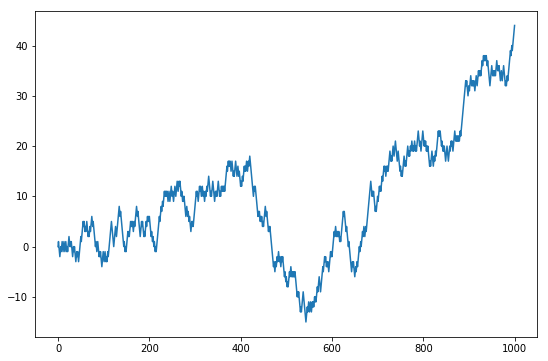

In [17]:
import random
import matplotlib.pyplot as plt

# 初期位置
position = 0 

# 最終位置位置
walk = [position]

# 試行回数
steps = 1000

for i in range(10):
    print("### random.randint(0, 1) = {}".format(random.randint(0, 1)))

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

print("\n### walk[1000] = {}".format(walk[1000]))

plt.figure(figsize=(9, 6))
plt.plot(walk[:])
plt.show()

# 感想
* ビューを返すのか、コピーを返すのかは意識する必要がありそう。  
（ビューを編集すれば、元データに変更が反映される。）
* 多次元配列は、階層をインデントして整理しないと混乱する。
* 軸の概念の理解は重要かも。２次元までなら、axis=0 (列)、axis=1 (行)で考えられる。
* 発表用に資料作すると結構時間かかる。